In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv("../data/cars.csv")
df.head()

,Maker,Model,Adv_year,Adv_month,Color,Selling_year,Bodytype,Mileage,Engine_size,Gearbox,...,Engine_power,Annual_Tax,Wheelbase,Height,Width,Length,Average_mpg,Top_speed_mph,Seat_num,Door_num
0,Bentley,Arnage,2018,April,Silver,2000,Saloon,60000,6.8L,Automatic,...,450.00,315,3116,1515,2125,5390,13.70,179.00,5,4
1,Bentley,Arnage,2018,June,Grey,2002,Saloon,44000,6.8L,Automatic,...,450.00,315,3116,1515,2125,5390,13.70,179.00,5,4
2,Bentley,Arnage,2017,November,Blue,2002,Saloon,55000,6.8L,Automatic,...,400.00,315,3116,1515,2125,5390,14.70,155.00,5,4
3,Bentley,Arnage,2018,April,Green,2003,Saloon,14000,6.8L,Automatic,...,450.00,315,3116,1515,2125,5390,13.70,179.00,5,4
4,Bentley,Arnage,2017,November,Grey,2003,Saloon,61652,6.8L,Automatic,...,450.00,315,3116,1515,2125,5390,13.70,179.00,5,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253806 entries, 0 to 253805
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Maker          253806 non-null  object 
 1   Model          253806 non-null  object 
 2   Adv_year       253806 non-null  int64  
 3   Adv_month      253806 non-null  object 
 4   Color          253806 non-null  object 
 5   Selling_year   253806 non-null  int64  
 6   Bodytype       253806 non-null  object 
 7   Mileage        253806 non-null  int64  
 8   Engine_size    253806 non-null  object 
 9   Gearbox        253806 non-null  object 
 10  Fuel_type      253806 non-null  object 
 11  Price          253806 non-null  float64
 12  Engine_power   253806 non-null  float64
 13  Annual_Tax     253806 non-null  object 
 14  Wheelbase      253806 non-null  int64  
 15  Height         253806 non-null  int64  
 16  Width          253806 non-null  int64  
 17  Length         253806 non-nul

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Adv_year,253806.00,2018.13,0.74,2012.00,2018.00,2018.00,2018.00,2021.00
Selling_year,253806.00,2012.65,4.42,1990.00,2009.00,2014.00,2016.00,2019.00
Mileage,253806.00,48720.53,41891.94,0.00,14757.00,40000.00,75500.75,6363342.00
Price,253806.00,14113.83,28555.71,100.00,4827.25,8999.00,16794.00,9999999.00
Engine_power,253806.00,152.06,85.95,44.00,100.00,128.00,178.00,740.00
Wheelbase,253806.00,2544.99,534.32,0.00,2510.00,2637.00,2751.00,5246.00
Height,253806.00,1532.06,173.63,0.00,1456.00,1495.00,1631.00,2660.00
Width,253806.00,1895.73,151.33,1475.00,1780.00,1884.00,2020.00,2690.00
Length,253806.00,4374.29,428.03,0.00,4081.00,4382.00,4672.00,6165.00
Average_mpg,253806.00,51.05,13.79,9.40,41.50,50.40,61.40,200.00


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib
sns.__version__

'0.13.2'

In [7]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [8]:
corr = df_numeric.corr()
corr

,Adv_year,Selling_year,Mileage,Price,Engine_power,Wheelbase,Height,Width,Length,Average_mpg,Top_speed_mph,Seat_num,Door_num
Adv_year,1.00,0.34,-0.19,0.07,-0.03,0.01,-0.01,0.01,-0.01,0.08,-0.02,0.02,0.06
Selling_year,0.34,1.00,-0.73,0.26,0.05,0.01,0.06,0.25,0.09,0.41,0.04,0.07,0.18
Mileage,-0.19,-0.73,1.00,-0.25,-0.05,0.01,-0.01,-0.14,0.08,-0.25,-0.02,0.06,-0.03
Price,0.07,0.26,-0.25,1.00,0.48,0.05,-0.01,0.23,0.22,-0.14,0.39,-0.10,-0.10
Engine_power,-0.03,0.05,-0.05,0.48,1.00,0.15,-0.02,0.39,0.55,-0.53,0.85,-0.15,-0.24
Wheelbase,0.01,0.01,0.01,0.05,0.15,1.00,0.13,0.20,0.08,0.05,0.24,0.14,0.14
Height,-0.01,0.06,-0.01,-0.01,-0.02,0.13,1.00,0.19,0.19,-0.09,-0.22,0.42,0.37
Width,0.01,0.25,-0.14,0.23,0.39,0.20,0.19,1.00,0.51,-0.11,0.36,0.19,0.13
Length,-0.01,0.09,0.08,0.22,0.55,0.08,0.19,0.51,1.00,-0.29,0.52,0.31,0.16
Average_mpg,0.08,0.41,-0.25,-0.14,-0.53,0.05,-0.09,-0.11,-0.29,1.00,-0.37,0.06,0.21


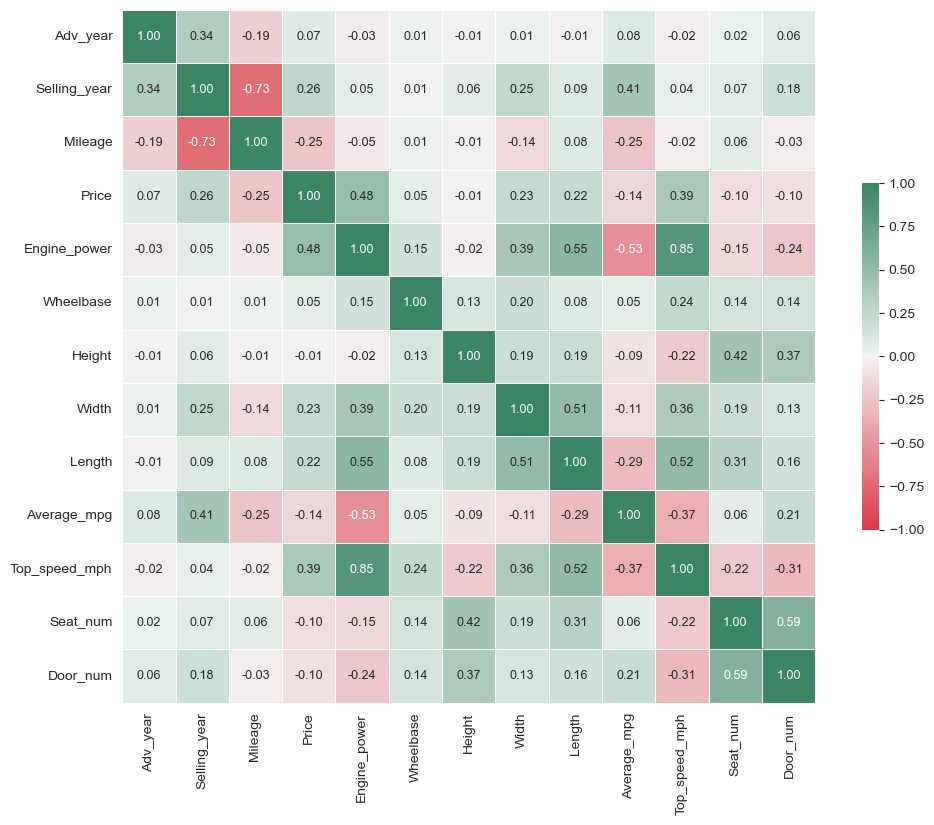

In [9]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

cmap = sns.diverging_palette(150, 10, as_cmap=True)

# Dibuja el mapa de calor sin la máscara
sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap.reversed(), vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot_kws={"size": 9})

# Muestra la figura
plt.show()

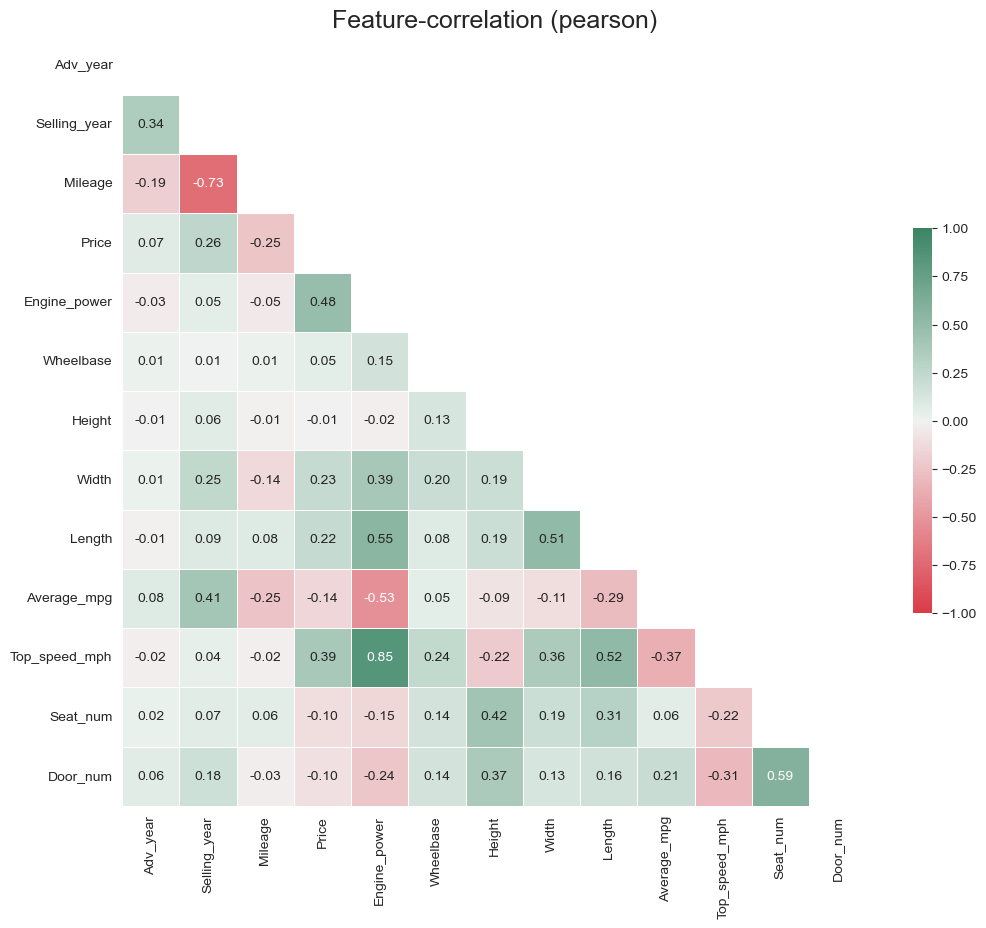

In [15]:
klib.corr_plot(df_numeric, cmap=cmap.reversed(), vmin=-1, vmax=1,cbar_kws={"shrink": .5})
plt.grid()